<a href="https://colab.research.google.com/github/kemalthoriq/car-rental-app/blob/master/sentiment_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

## 1. Crawling Data BPJS Twitter

In [ ]:
# Crawl Data Twitter BPJS

filename = "bpjs_tweets.csv"
search_keyword = "bpjs"

limit = 1000

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} -- token

## Token Tweet : 47705bcd5b4dda8552a013d385f29339133ca7a4

⠙⠹⠸⠼⠴⠦Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › *******

## 2. Output Data Komentar BPJS di Twitter

In [32]:
import pandas as pd

filename = "bpjs_tweets.csv"

file_path = f"tweets-data/{filename}"

df = pd.read_csv(file_path, delimiter=",")

display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1879836598491373693,Thu Jan 16 15:01:17 +0000 2025,83,@KangManto123 Si kontil ama pegawai BPJS aja k...,1879906777279729751,https://pbs.twimg.com/media/GhbFQF3bIAA6aus.jpg,KangManto123,in,NaN,2,6,24,https://x.com/rimba890/status/1879906777279729751,2700582162,rimba890
1,1877878634352189575,Sat Jan 11 00:42:23 +0000 2025,285,Apa yang salah dengan sistem BPJS kita?‍️ http...,1877878689352094137,https://pbs.twimg.com/media/Gg-QtWAbcAA0ziJ.jpg,eexxoo_7,in,"DKI Jakarta, Indonesia",6,13,46,https://x.com/eexxoo_7/status/1877878689352094137,2511596892,eexxoo_7
2,1879802051926061492,Thu Jan 16 08:05:08 +0000 2025,341,BPJS Tak Bisa Tanggung Semua Pengobatan Menkes...,1879802051926061492,https://pbs.twimg.com/media/GhZl7eiakAA5l1i.jpg,NaN,in,Jakarta,182,486,148,https://x.com/kompascom/status/187980205192606...,23343960,kompascom
3,1877710820307530029,Fri Jan 10 15:50:21 +0000 2025,580,@worksfess Stop bilang kalo bpjs adalah benefi...,1877744797366280528,NaN,worksfess,in,"Yogyakarta, Indonesia",0,5,12,https://x.com/rnrfkhri/status/1877744797366280528,1642806133,rnrfkhri
4,1879514323955126431,Wed Jan 15 13:01:49 +0000 2025,2,Ngantri berobat 3 jam cuma buat nunggu nama di...,1879514323955126431,NaN,NaN,in,NaN,0,0,0,https://x.com/bendol30/status/1879514323955126431,114376538,bendol30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1876999023636238544,Fri Jan 10 04:04:55 +0000 2025,0,@masihadaa Salam Sehat Sahabat. Mohon maaf jik...,1877567269896859772,NaN,masihadaa,in,Indonesia,0,0,0,https://x.com/BPJSKesehatanRI/status/187756726...,1522337929,BPJSKesehatanRI
527,1877530215720824970,Fri Jan 10 03:19:48 +0000 2025,0,@naastarry Salam. Prosedur untuk penonaktifan ...,1877555918528774438,NaN,naastarry,in,Indonesia,0,0,0,https://x.com/BPJSKesehatanRI/status/187755591...,1522337929,BPJSKesehatanRI
528,1877530215720824970,Fri Jan 10 03:20:43 +0000 2025,0,@naastarry Sahabat dapat melakukan pelaporan s...,1877556146124337161,NaN,naastarry,in,Indonesia,0,0,0,https://x.com/BPJSKesehatanRI/status/187755614...,1522337929,BPJSKesehatanRI
529,1877656194497511903,Fri Jan 10 09:58:16 +0000 2025,1,mau kemana lagi gue nyari sisaan buat bayar bp...,1877656194497511903,NaN,NaN,in,NaN,0,0,0,https://x.com/madmaxeugene/status/187765619449...,620046357,madmaxeugene


## 3. Jumlah Frame Data

In [5]:
num_tweets = len(df)

print(f"Jumlah tweet dalam dataframe adalah {num_tweets}")

Jumlah tweet dalam dataframe adalah 531


## 4. Preproccessing Data

4.1 Clean Text Data

In [9]:
import nltk
nltk.download('punkt_tab')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Fungsi membersihkan teks
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    return " ".join([word for word in tokens if word not in stop_words])

if 'text' in df.columns:
    df['cleaned_text'] = df['text'].apply(clean_text)
elif 'tweet' in df.columns:
    df['cleaned_text'] = df['tweet'].apply(clean_text)
    print("Using 'tweet' column instead of 'text'")
elif 'full_text' in df.columns:
    df['cleaned_text'] = df['full_text'].apply(clean_text)
    print("Using 'full_text' column instead of 'text'")
else:
    raise KeyError("Tidak ada kolom 'text', 'tweet', atau 'full_text'.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Using 'full_text' column instead of 'text'


4.2 Tokenize

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])

X = tokenizer.texts_to_sequences(df['cleaned_text'])

In [35]:
tokenized = df_copy['favorite_count'].apply(lambda x: str(x).split())
tokenized.head()

,favorite_count
0,[83]
1,[285]
2,[341]
3,[580]
4,[2]


4.3 Stemming

In [12]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [13]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemmed_text'] = df['cleaned_text'].apply(stemmer.stem)

## 5. Labeling Data

In [14]:
def assign_label(text):
    positif_keywords = ["baik", "jujur", "suka", "senang", "puas"]
    negatif_keywords = ["buruk", "bohong", "marah", "kecewa", "sedih"]
    text = text.lower()
    if any(word in text for word in positif_keywords):
        return 1  # Positif
    elif any(word in text for word in negatif_keywords):
        return 0  # Negatif
    else:
        return 2  # Netral

df['label'] = df['stemmed_text'].apply(assign_label)


## 6. Normalisasi Data

In [17]:
if 'tweet' in df.columns:
    df['combined_text'] = df['stemmed_text'] + " " + df['tweet']
elif 'text' in df.columns:
    df['combined_text'] = df['stemmed_text'] + " " + df['text']
elif 'full_text' in df.columns:
    df['combined_text'] = df['stemmed_text'] + " " + df['full_text']
else:
    raise KeyError("Tidak ada kolom 'text', 'tweet', atau 'full_text' untuk digabungkan.")

## 8. Model LSTM

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 9. Training Model

In [20]:
!pip install scikit-learn

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 50

X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')

X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, df['label'], test_size=0.2, random_state=42
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.8719 - loss: 0.6539 - val_accuracy: 0.9720 - val_loss: 0.1553
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9795 - loss: 0.1154 - val_accuracy: 0.9720 - val_loss: 0.1461
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.9737 - loss: 0.1381 - val_accuracy: 0.9720 - val_loss: 0.1464
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9810 - loss: 0.1077 - val_accuracy: 0.9720 - val_loss: 0.1529
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9780 - loss: 0.1200 - val_accuracy: 0.9720 - val_loss: 0.1460
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9653 - loss: 0.1741 - val_accuracy: 0.9720 - val_loss: 0.1467
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9778 - loss: 0.1217 - val_accuracy: 0.9720 - val_loss: 0.1506
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9782 - loss: 0.1176 - val_accuracy: 0.

## 10. Evaluasi Model

10.1 Classification Report

In [24]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00         2
     Positif       0.97      1.00      0.99       104

    accuracy                           0.97       107
   macro avg       0.32      0.33      0.33       107
weighted avg       0.94      0.97      0.96       107



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


10.2 Confusion Matrix

<Axes: >

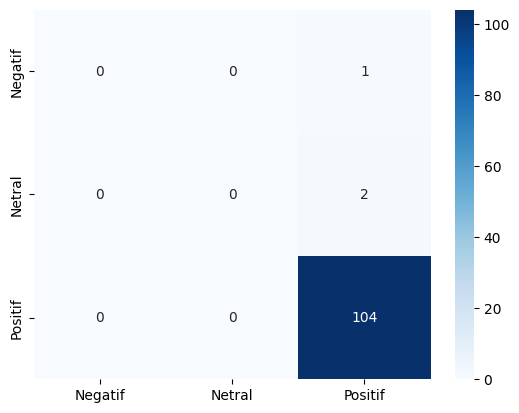

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])


10.3 Visualisasi Peforma Model

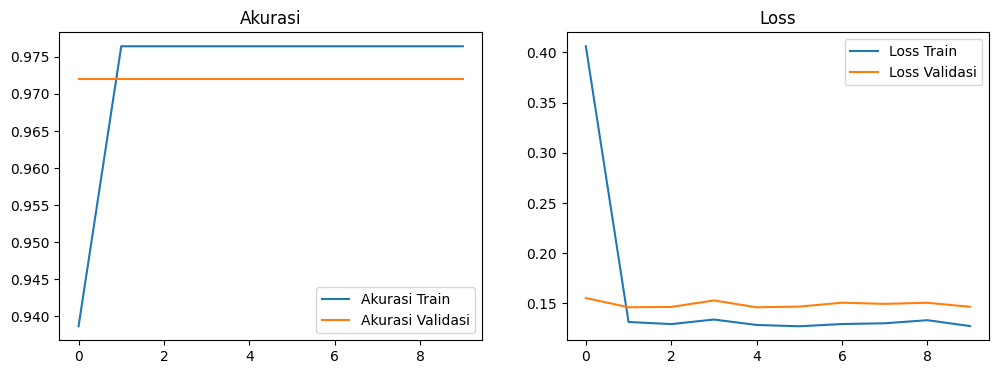

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Train')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend()
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Train')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend()
plt.title('Loss')
plt.show()

## 11. Plot Akurasi & Loss Data

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9815 - loss: 0.1068
Akurasi: 97.20%


## 12. Labeling Data

In [30]:
df_copy = df.copy()

In [28]:
label = []
for _, row in df.iterrows():
    if row["favorite_count"] > 50 and row["retweet_count"] > 20 and row["reply_count"] > 10:
        label.append(1)  # High engagement
    else:
        label.append(0)  # Low engagement

df["label"] = label


In [31]:
df_copy.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text,stemmed_text,label,combined_text
0,1879836598491373693,Thu Jan 16 15:01:17 +0000 2025,83,@KangManto123 Si kontil ama pegawai BPJS aja k...,1879906777279729751,https://pbs.twimg.com/media/GhbFQF3bIAA6aus.jpg,KangManto123,in,NaN,2,6,24,https://x.com/rimba890/status/1879906777279729751,2700582162,rimba890,si kontil ama pegawai bpjs aja kaga yg pake bp...,si kontil ama pegawai bpjs aja kaga yg pake bp...,0,si kontil ama pegawai bpjs aja kaga yg pake bp...
1,1877878634352189575,Sat Jan 11 00:42:23 +0000 2025,285,Apa yang salah dengan sistem BPJS kita?‍️ http...,1877878689352094137,https://pbs.twimg.com/media/Gg-QtWAbcAA0ziJ.jpg,eexxoo_7,in,"DKI Jakarta, Indonesia",6,13,46,https://x.com/eexxoo_7/status/1877878689352094137,2511596892,eexxoo_7,salah sistem bpjs,salah sistem bpjs,1,salah sistem bpjs Apa yang salah dengan sistem...
2,1879802051926061492,Thu Jan 16 08:05:08 +0000 2025,341,BPJS Tak Bisa Tanggung Semua Pengobatan Menkes...,1879802051926061492,https://pbs.twimg.com/media/GhZl7eiakAA5l1i.jpg,NaN,in,Jakarta,182,486,148,https://x.com/kompascom/status/187980205192606...,23343960,kompascom,bpjs tanggung pengobatan menkes usul asuransi ...,bpjs tanggung obat menkes usul asuransi swasta...,1,bpjs tanggung obat menkes usul asuransi swasta...
3,1877710820307530029,Fri Jan 10 15:50:21 +0000 2025,580,@worksfess Stop bilang kalo bpjs adalah benefi...,1877744797366280528,NaN,worksfess,in,"Yogyakarta, Indonesia",0,5,12,https://x.com/rnrfkhri/status/1877744797366280528,1642806133,rnrfkhri,stop bilang kalo bpjs benefit kewajiban perusa...,stop bilang kalo bpjs benefit wajib usaha btw,0,stop bilang kalo bpjs benefit wajib usaha btw ...
4,1879514323955126431,Wed Jan 15 13:01:49 +0000 2025,2,Ngantri berobat 3 jam cuma buat nunggu nama di...,1879514323955126431,NaN,NaN,in,NaN,0,0,0,https://x.com/bendol30/status/1879514323955126431,114376538,bendol30,ngantri berobat jam nunggu nama dipanggil pas ...,ngantri obat jam nunggu nama panggil pas perik...,0,ngantri obat jam nunggu nama panggil pas perik...


## 13. Labeling Data Per Kalimat

In [38]:
import pandas as pd
import string
import re

df = pd.read_csv("/content/sentiment_analysis_bpjs.csv")

negative_keywords = ["jelek", "gagal", "buruk", "salah", "benci", "lambat", "tidak puas", "kecewa", "mencekam"]
neutral_keywords = ["oke", "cukup", "biasa", "standar", "lumayan"]
positive_keywords = ["bagus", "sukses", "luar biasa", "hebat", "senang", "puas", "memuaskan", "terbaik"]

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

def label_sentiment(text):
    if not text:
        return "Tidak Diketahui"

    text = preprocess_text(text)

    if any(word in text for word in negative_keywords):
        return "Negatif"
    elif any(word in text for word in neutral_keywords):
        return "Netral"
    elif any(word in text for word in positive_keywords):
        return "Positif"
    else:
        return "Tidak Diketahui"

df["hasil_sentimen"] = df["text"].apply(label_sentiment)

df.to_csv("/content/sentiment_analysis_labels.csv", index=False)

print(df.head())


   conversation_id_str                      created_at  favorite_count  \
0  1879836598491373693  Thu Jan 16 15:01:17 +0000 2025              83   
1  1877878634352189575  Sat Jan 11 00:42:23 +0000 2025             285   
2  1879802051926061492  Thu Jan 16 08:05:08 +0000 2025             341   
3  1877710820307530029  Fri Jan 10 15:50:21 +0000 2025             580   
4  1879514323955126431  Wed Jan 15 13:01:49 +0000 2025               2   

                                                text               id_str  \
0  @KangManto123 Si kontil ama pegawai BPJS aja k...  1879906777279729751   
1  Apa yang salah dengan sistem BPJS kita?‍️ http...  1877878689352094137   
2  BPJS Tak Bisa Tanggung Semua Pengobatan Menkes...  1879802051926061492   
3  @worksfess Stop bilang kalo bpjs adalah benefi...  1877744797366280528   
4  Ngantri berobat 3 jam cuma buat nunggu nama di...  1879514323955126431   

                                         image_url in_reply_to_screen_name  \
0  https://pbs